# 1. A simple feedforward neural network for classifying MNIST digits

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test .csv")

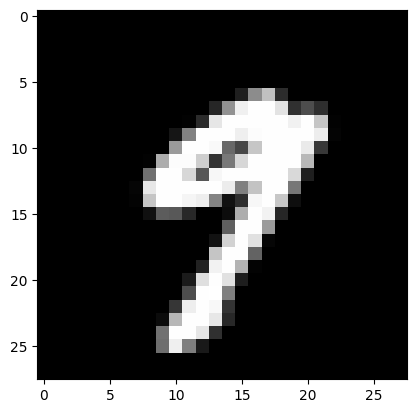

In [9]:
# Plot some of the digits
def plot_digit(data, index):
    digit = data.iloc[index, 1:].values.reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.show()

plot_digit(test_data, 20)

In [10]:
# Prepare the data
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [11]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
# Reshape the data to match the input shape of the model
X_train = X_train.reshape(-1, 28, 28, 1)  # Add a channel dimension
X_test = X_test.reshape(-1, 28, 28, 1)    # Add a channel dimension

In [31]:
# Build the neural network model
model = Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Input shape includes channel dimension
    Flatten(),
    Dense(15, activation='relu'),
    Dense(10, activation='softmax')
])

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ann = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.9555 - loss: 0.1495 - val_accuracy: 0.9582 - val_loss: 0.1472
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.9602 - loss: 0.1375 - val_accuracy: 0.9550 - val_loss: 0.1528
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.9583 - loss: 0.1381 - val_accuracy: 0.9565 - val_loss: 0.1518
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9608 - loss: 0.1327 - val_accuracy: 0.9573 - val_loss: 0.1465
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.9615 - loss: 0.1290 - val_accuracy: 0.9582 - val_loss: 0.1422
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9632 - loss: 0.1256 - val_accuracy: 0.9595 - val_loss: 0.1452
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - accuracy: 0.9638 - loss: 0.1266 - val_accuracy: 0.9587 - val_loss: 0.1481
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.9647 -

In [45]:
# Predict on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step


In [46]:
# Correct Classification Rate
correct_classification_rate = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f'Correct Classification Rate: {correct_classification_rate}')

Correct Classification Rate: 0.951


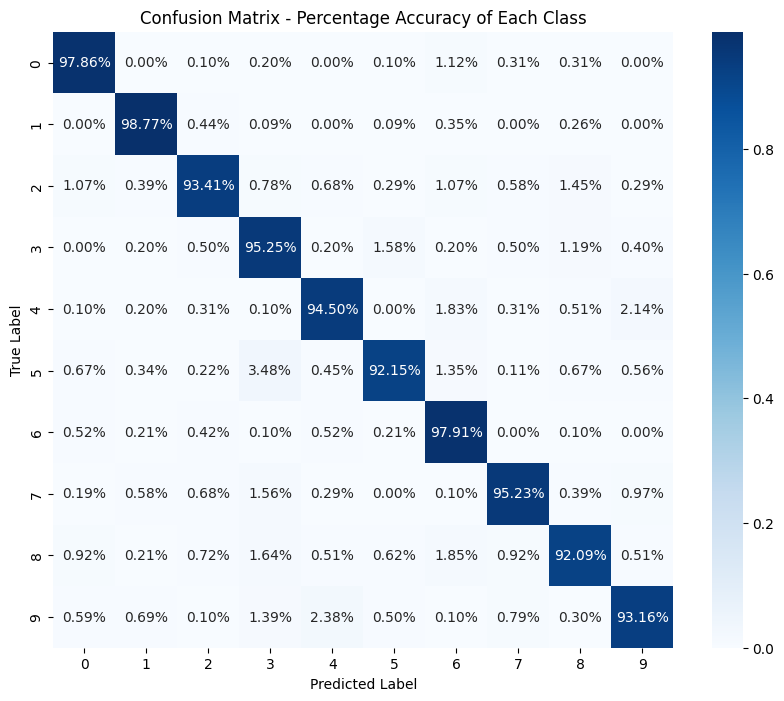

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix to show percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Percentage Accuracy of Each Class')
plt.show()


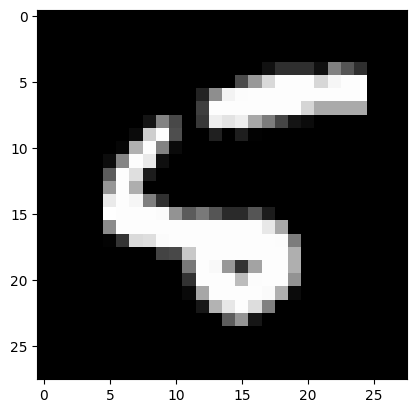

True label: 5, Predicted: 6


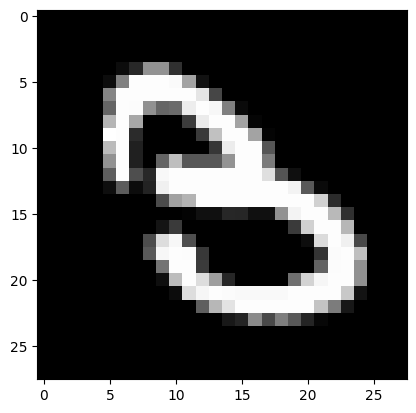

True label: 3, Predicted: 8


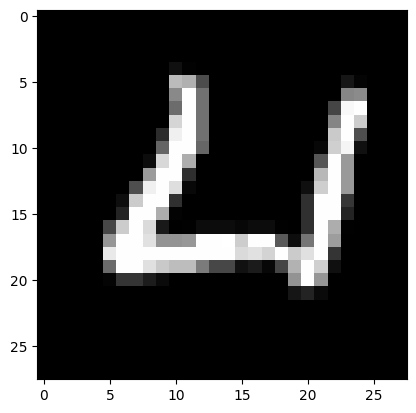

True label: 4, Predicted: 0


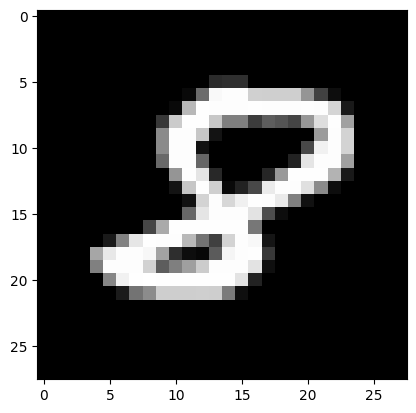

True label: 8, Predicted: 2


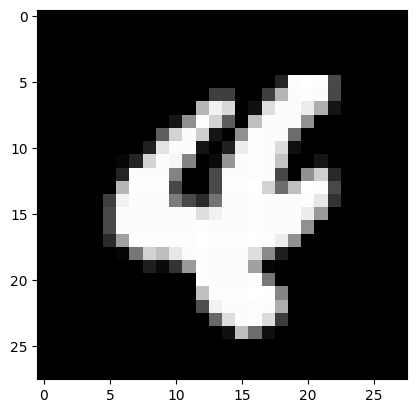

True label: 4, Predicted: 6


In [48]:
# See some of the digits that were misclassified
misclassified_indices = np.where(predicted_classes != true_classes)[0]
for index in misclassified_indices[:5]:  # Show first 5 misclassified digits
    plot_digit(test_data, index)
    print(f'True label: {true_classes[index]}, Predicted: {predicted_classes[index]}')

# 2. Using a Convolutional Neural Network (CNN) for classifying MNIST digits

In [13]:
# Import additional required libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [14]:
# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/Users/connorraney/.virtualenvs/machinelearning/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [16]:
# Train the model
history = cnn_model.fit(X_train, y_train, epochs=10, 
                        validation_split=0.1, 
                        batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8278 - loss: 0.5370 - val_accuracy: 0.9840 - val_loss: 0.0541
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9729 - loss: 0.0964 - val_accuracy: 0.9878 - val_loss: 0.0450
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9811 - loss: 0.0653 - val_accuracy: 0.9903 - val_loss: 0.0328
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9855 - loss: 0.0479 - val_accuracy: 0.9930 - val_loss: 0.0297
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9882 - loss: 0.0406 - val_accuracy: 0.9908 - val_loss: 0.0355
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9923 - val_loss: 0.0278
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9922 - loss: 0.0262 - val_accuracy: 0.9917 - val_loss: 0.0315
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9927 - loss: 0

In [17]:
# Evaluate the model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)
print(f'CNN Test accuracy: {cnn_test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0358
CNN Test accuracy: 0.9937000274658203


In [21]:
# Predict on the test set
cnn_predictions = cnn_model.predict(X_test)
cnn_predicted_classes = np.argmax(cnn_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [23]:
# Correct Classification Rate
true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels back to class indices
cnn_correct_classification_rate = np.sum(cnn_predicted_classes == true_classes) / len(true_classes)
print(f'CNN Correct Classification Rate: {cnn_correct_classification_rate:.4f}')

CNN Correct Classification Rate: 0.9937


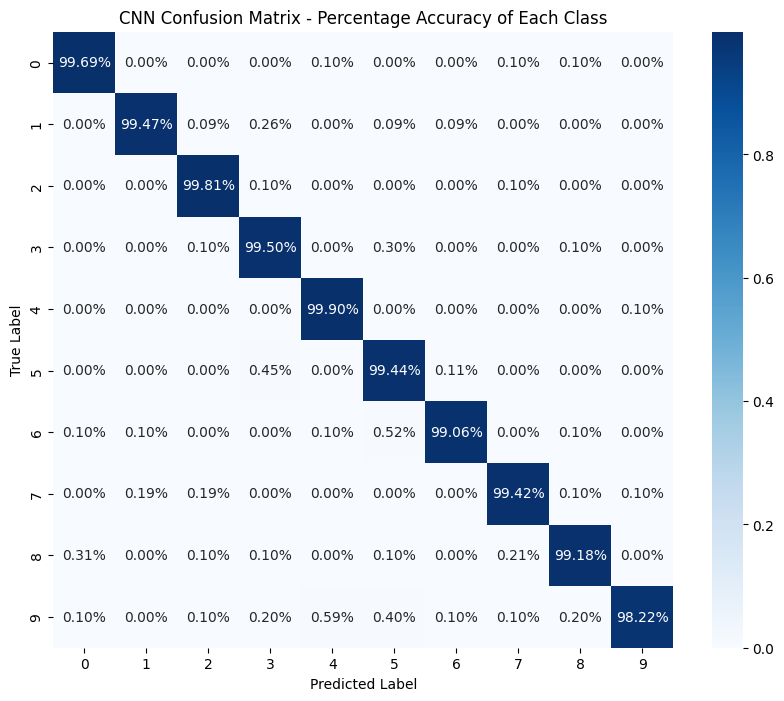

In [25]:
# Generate and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cnn_conf_matrix = confusion_matrix(true_classes, cnn_predicted_classes)
cnn_conf_matrix_normalized = cnn_conf_matrix.astype('float') / cnn_conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cnn_conf_matrix_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix - Percentage Accuracy of Each Class')
plt.show()

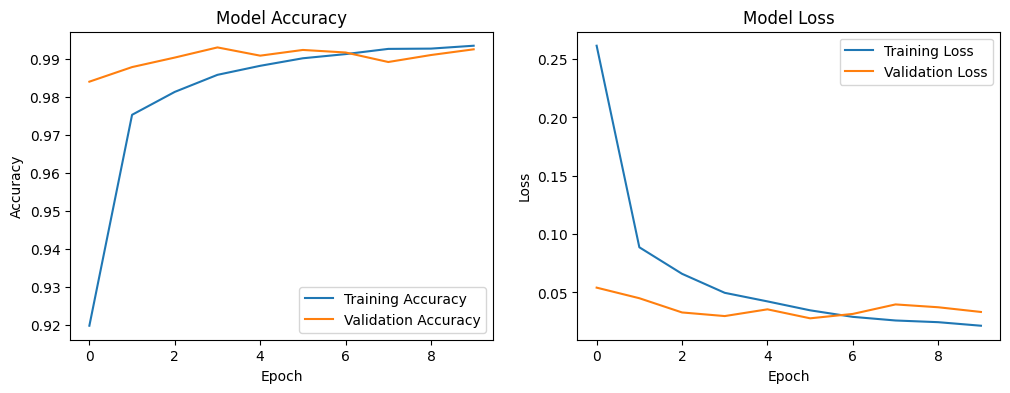

In [26]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

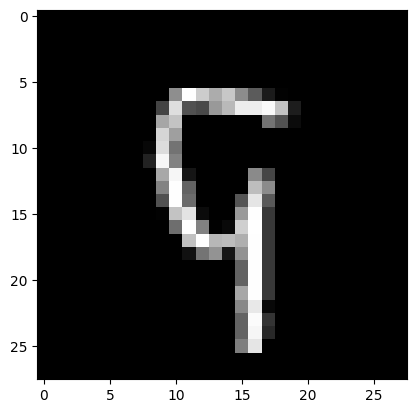

True label: 9, CNN Predicted: 5


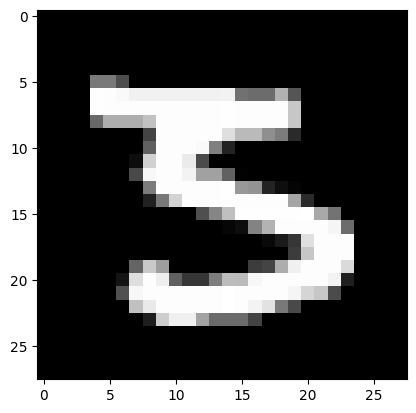

True label: 3, CNN Predicted: 5


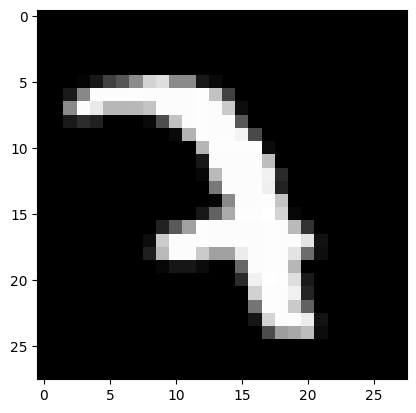

True label: 7, CNN Predicted: 2


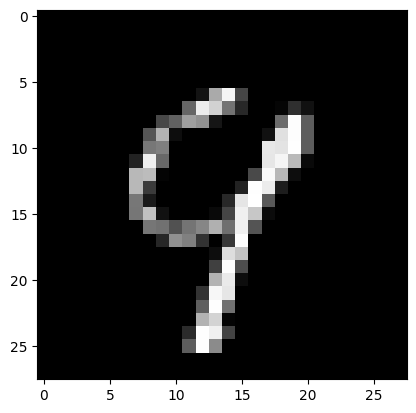

True label: 9, CNN Predicted: 4


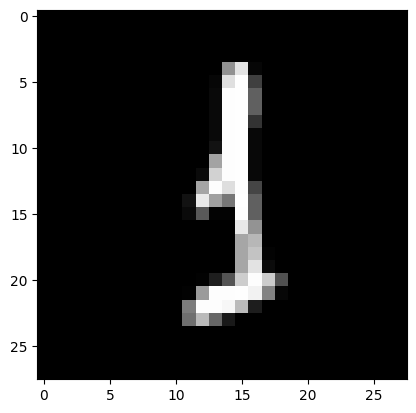

True label: 1, CNN Predicted: 3


In [27]:
# See some of the digits that were misclassified by the CNN
cnn_misclassified_indices = np.where(cnn_predicted_classes != true_classes)[0]
for index in cnn_misclassified_indices[:5]:  # Show first 5 misclassified digits
    plot_digit(test_data, index)
    print(f'True label: {true_classes[index]}, CNN Predicted: {cnn_predicted_classes[index]}')

# 3. Comparing Feedforward and Convolutional Neural Networks

In [37]:
# Print accuracy comparison
print(f'ANN Test accuracy: {test_acc}')
print(f'CNN Test accuracy: {cnn_test_acc}')

print(f'ANN Correct Classification Rate: {correct_classification_rate}')
print(f'CNN Correct Classification Rate: {cnn_correct_classification_rate}')

ANN Test accuracy: 0.9469000101089478
CNN Test accuracy: 0.9937000274658203
ANN Correct Classification Rate: 0.9469
CNN Correct Classification Rate: 0.9937


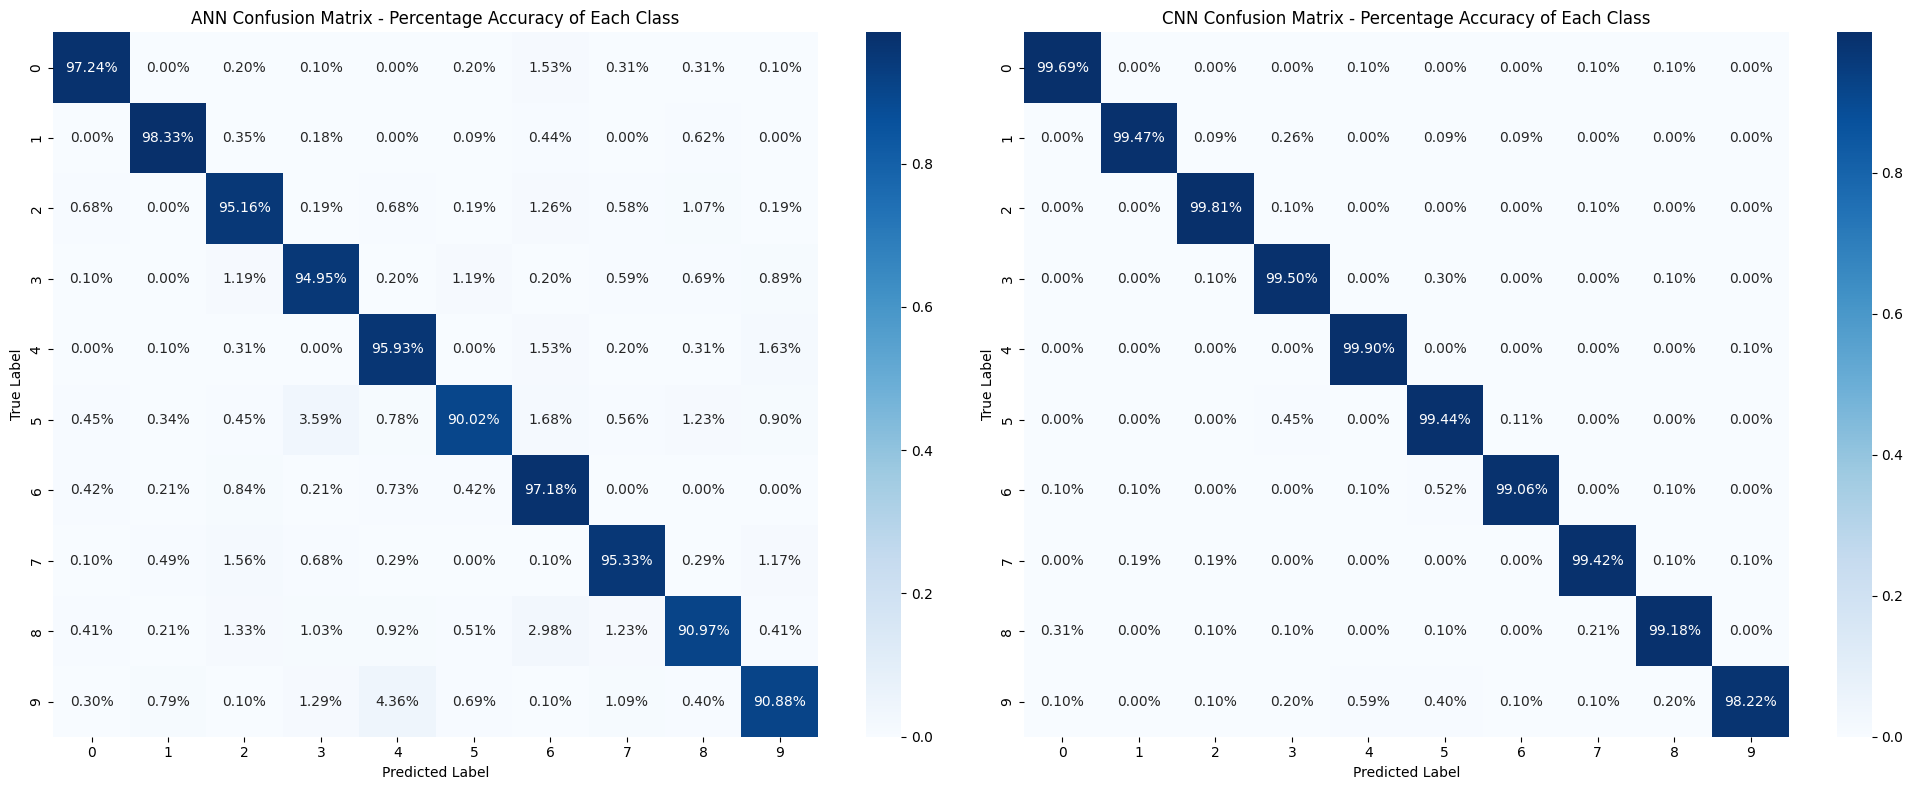

In [38]:
# Plot confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=range(10), yticklabels=range(10), ax=ax1)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
ax1.set_title('ANN Confusion Matrix - Percentage Accuracy of Each Class')

sns.heatmap(cnn_conf_matrix_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=range(10), yticklabels=range(10), ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('CNN Confusion Matrix - Percentage Accuracy of Each Class')

plt.tight_layout()
plt.show()

In [39]:
# Compare misclassifications
ann_misclassified = set(np.where(predicted_classes != true_classes)[0])
cnn_misclassified = set(np.where(cnn_predicted_classes != true_classes)[0])

print(f"Number of samples misclassified by ANN: {len(ann_misclassified)}")
print(f"Number of samples misclassified by CNN: {len(cnn_misclassified)}")
print(f"Number of samples misclassified by both: {len(ann_misclassified.intersection(cnn_misclassified))}")

Number of samples misclassified by ANN: 531
Number of samples misclassified by CNN: 63
Number of samples misclassified by both: 41


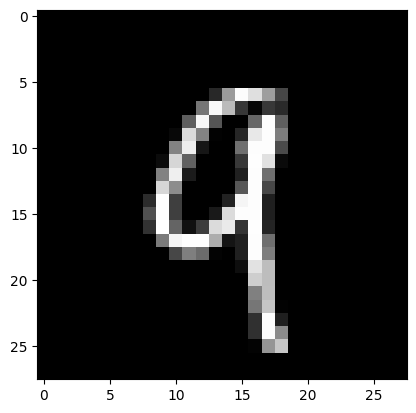

True label: 9, ANN Predicted: 4, CNN Predicted: 9


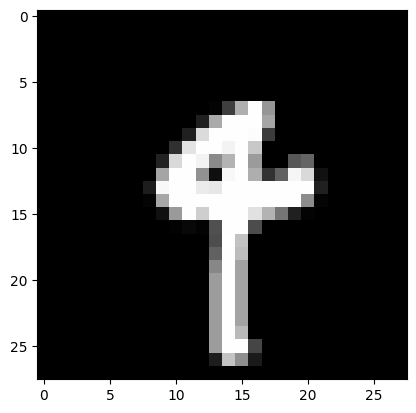

True label: 4, ANN Predicted: 9, CNN Predicted: 4


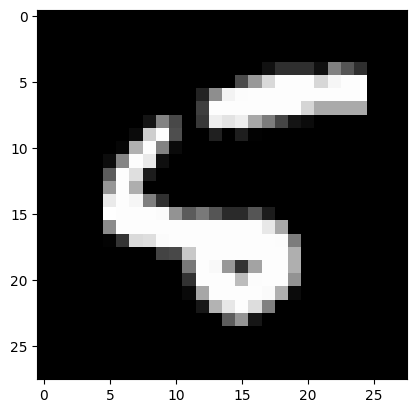

True label: 5, ANN Predicted: 6, CNN Predicted: 5


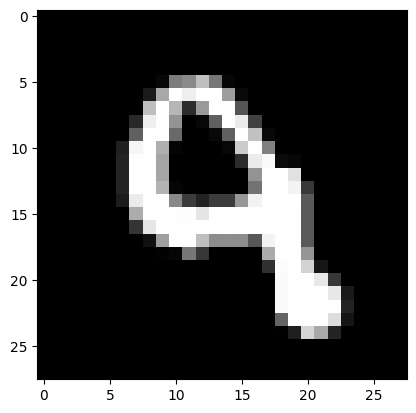

True label: 9, ANN Predicted: 4, CNN Predicted: 9


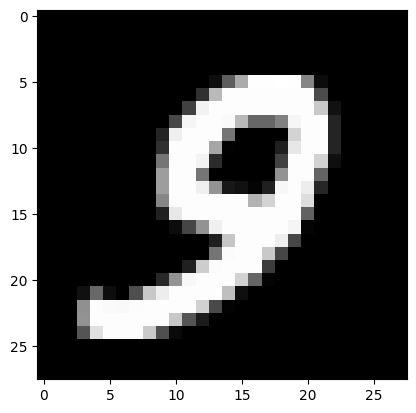

True label: 9, ANN Predicted: 3, CNN Predicted: 9


In [40]:
# Plot some examples where CNN correctly classified but ANN didn't
cnn_correct_ann_incorrect = list(ann_misclassified - cnn_misclassified)
for index in cnn_correct_ann_incorrect[:5]:  # Show first 5 such examples
    plot_digit(test_data, index)
    print(f'True label: {true_classes[index]}, ANN Predicted: {predicted_classes[index]}, CNN Predicted: {cnn_predicted_classes[index]}')

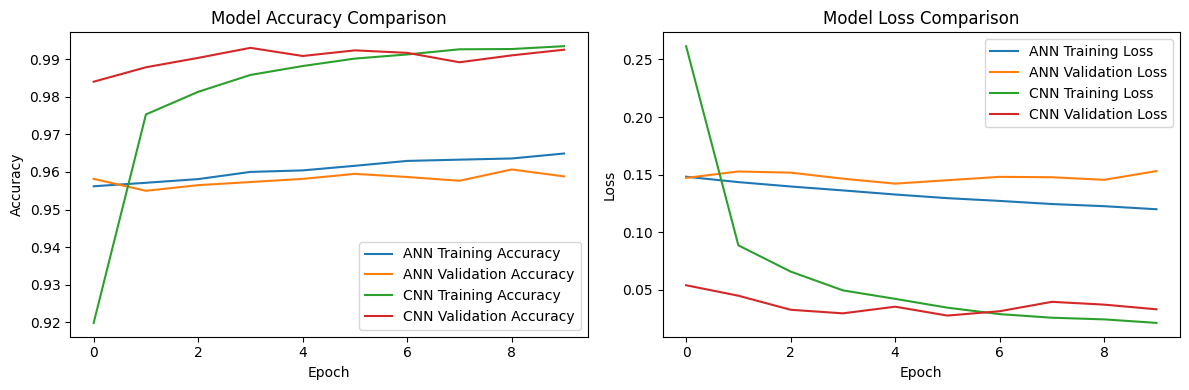

In [49]:
# Compare training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='ANN Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='ANN Training Loss')
plt.plot(history_ann.history['val_loss'], label='ANN Validation Loss')
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()